In [1]:
pip install numpy scipy pythran bitarray

     |████████████████████████████████| 4.3 MB 7.4 MB/s 
     |████████████████████████████████| 82 kB 1.5 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
  Created wheel for bitarray: filename=bitarray-2.2.5-cp37-cp37m-linux_x86_64.whl size=162872 sha256=25e39645dd7618432430e3084ac2e77c5569d872e388a2dd3cec139071a30ee1
  Stored in directory: /root/.cache/pip/wheels/5c/96/ce/f636246b94001814de808fab4dc036f86981560dd8568a815d
Successfully built bitarray
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires gast==0.4.0, but you have gast 0.5.2 which is incompatible.


In [2]:
!git clone https://github.com/ChalmersPhotonicsLab/QAMpy.git

Cloning into 'QAMpy'...
remote: Enumerating objects: 9858, done.
remote: Counting objects: 100% (1597/1597), done.
remote: Compressing objects: 100% (511/511), done.
remote: Total 9858 (delta 1184), reused 1477 (delta 1083), pack-reused 8261
Receiving objects: 100% (9858/9858), 225.76 MiB | 30.00 MiB/s, done.
Resolving deltas: 100% (6775/6775), done.


In [3]:
cd QAMpy/

/content/QAMpy


In [4]:
!python setup.py build

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/qampy
copying qampy/signals.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/io.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/equalisation.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/__init__.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/impairments.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/filtering.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/theory.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/phaserec.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/analog_frontend.py -> build/lib.linux-x86_64-3.7/qampy
copying qampy/helpers.py -> build/lib.linux-x86_64-3.7/qampy
creating build/lib.linux-x86_64-3.7/qampy/core
copying qampy/core/digital_pre_compensation.py -> build/lib.linux-x86_64-3.7/qampy/core
copying qampy/core/io.py -> build/lib.linux-x86_64-3.7/qampy/core
copying qampy/core/processing.py -> build/lib.linu

In [5]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating qampy.egg-info
writing qampy.egg-info/PKG-INFO
writing dependency_links to qampy.egg-info/dependency_links.txt
writing requirements to qampy.egg-info/requires.txt
writing top-level names to qampy.egg-info/top_level.txt
writing manifest file 'qampy.egg-info/SOURCES.txt'
adding license file 'COPYING'
writing manifest file 'qampy.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/qampy
copying build/lib.linux-x86_64-3.7/qampy/signals.py -> build/bdist.linux-x86_64/egg/qampy
copying build/lib.linux-x86_64-3.7/qampy/io.py -> build/bdist.linux-x86_64/egg/qampy
copying build/lib.linux-x86_64-3.7/qampy/equalisation.py -> build/bdist.linux-x86_64/egg/qampy
copying build/lib.linux-x86_64-3.7/qampy/__init__.py -> build/bdist.linux-x86_64/egg/qampy
c

In [6]:
%load_ext autoreload

In [7]:
%autoreload 2

In [8]:
from Funcoes import *

In [9]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['lines.linewidth'] = 2

In [10]:
M = 64        # ordem da modulação
Fb = 24e9      # taxa de símbolos
SpS = 8         # amostras por símbolo
Fs = SpS*Fb    # taxa de amostragem
SNR = 50        # relação sinal ruído (dB)
rolloff = 0.05  # Rolloff do filtro formatador de pulso
amostras = 128
size = 200000

In [11]:
qam_signal = generate_signal(M,Fb,SpS,SNR)
sfm,A, CSPR = qam_signal_phase_min(qam_signal,A)
data,X,y = dataset_02(sfm,amostras,size)
X_train, y_train, X_test, y_test = train_test_datasets(X,y,size)

NameError: ignored

In [ ]:
CSPR

ResampledQAM(10.9784316)

In [ ]:
np.mean(np.abs(qam_signal**2))

ResampledQAM(0.99979513)

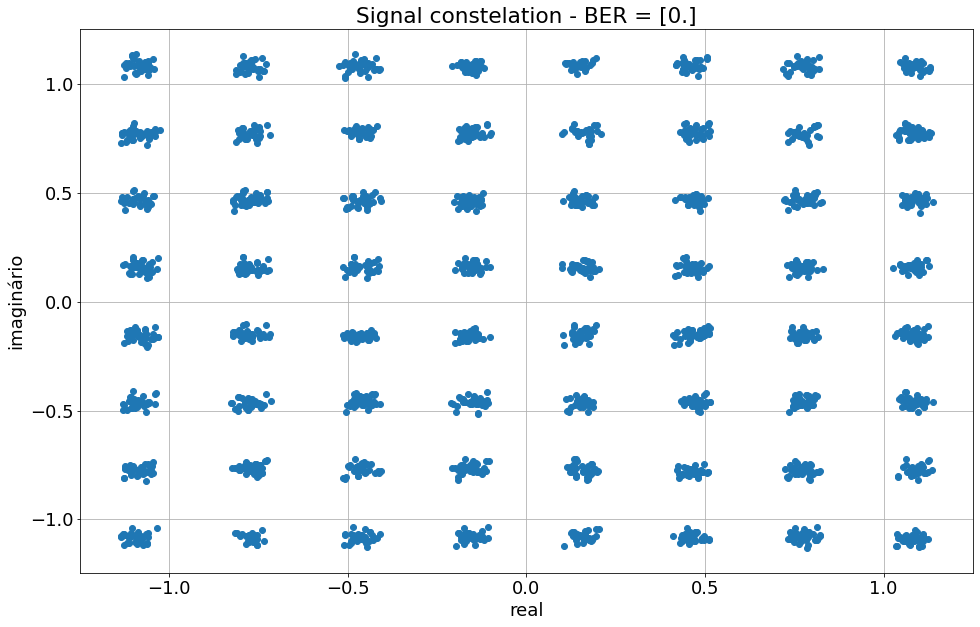

In [ ]:
plot_constelation(qam_signal,SpS)

In [ ]:
model = ANN_model(X_train, y_train,X_test, y_test,patience=10)

Epoch 1/300
5000/5000 [==============================] - 8s 1ms/step - loss: 8.4479e-04 - val_loss: 1.0000e-04
Epoch 2/300
5000/5000 [==============================] - 7s 1ms/step - loss: 1.0324e-04 - val_loss: 9.6907e-05
Epoch 3/300
5000/5000 [==============================] - 7s 1ms/step - loss: 9.7782e-05 - val_loss: 8.1875e-05
Epoch 4/300
5000/5000 [==============================] - 7s 1ms/step - loss: 9.0628e-05 - val_loss: 7.3684e-05
Epoch 5/300
5000/5000 [==============================] - 7s 1ms/step - loss: 8.5233e-05 - val_loss: 7.7603e-05
Epoch 6/300
5000/5000 [==============================] - 7s 1ms/step - loss: 8.2962e-05 - val_loss: 9.8049e-05
Epoch 7/300
5000/5000 [==============================] - 7s 1ms/step - loss: 8.1044e-05 - val_loss: 8.3742e-05
Epoch 8/300
5000/5000 [==============================] - 7s 1ms/step - loss: 8.0953e-05 - val_loss: 7.4614e-05
Epoch 9/300
5000/5000 [==============================] - 7s 1ms/step - loss: 7.9195e-05 - val_loss: 9.4532e-05
E

KeyboardInterrupt: ignored

In [ ]:
from qampy.theory import ber_vs_es_over_n0_qam as ber_theory
print("BER (teórica): ", np.array2string(ber_theory(helpers.dB2lin(SNR), M)))

BER (teórica):  0.


In [ ]:
predicted_signal = predict_signal(model,data,X_test,size)
reverted_signal = revert_sfm(predicted_signal,A)

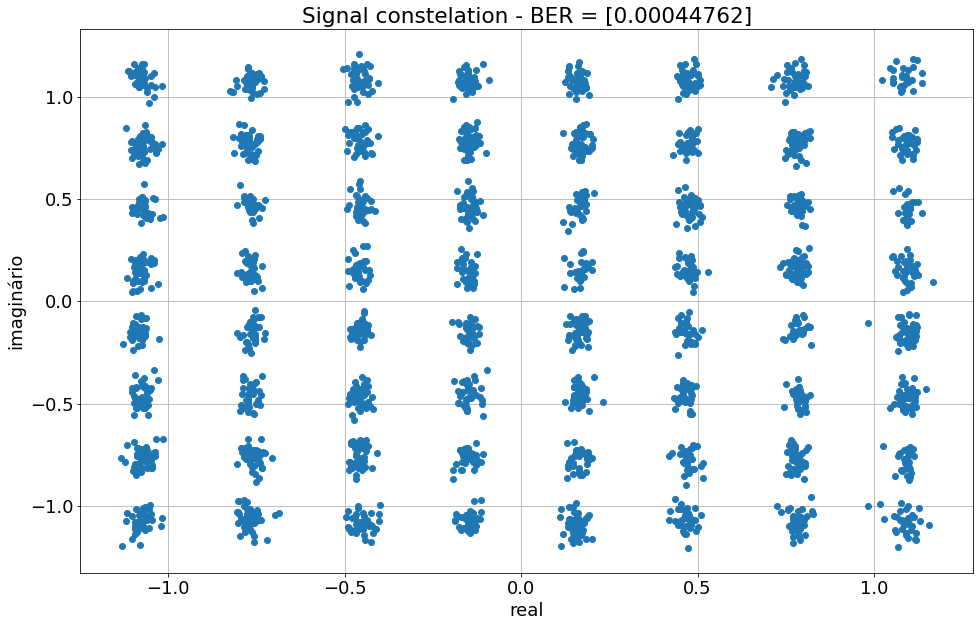

In [ ]:
plot_constelation(reverted_signal[:,5000:size-5000],SpS)

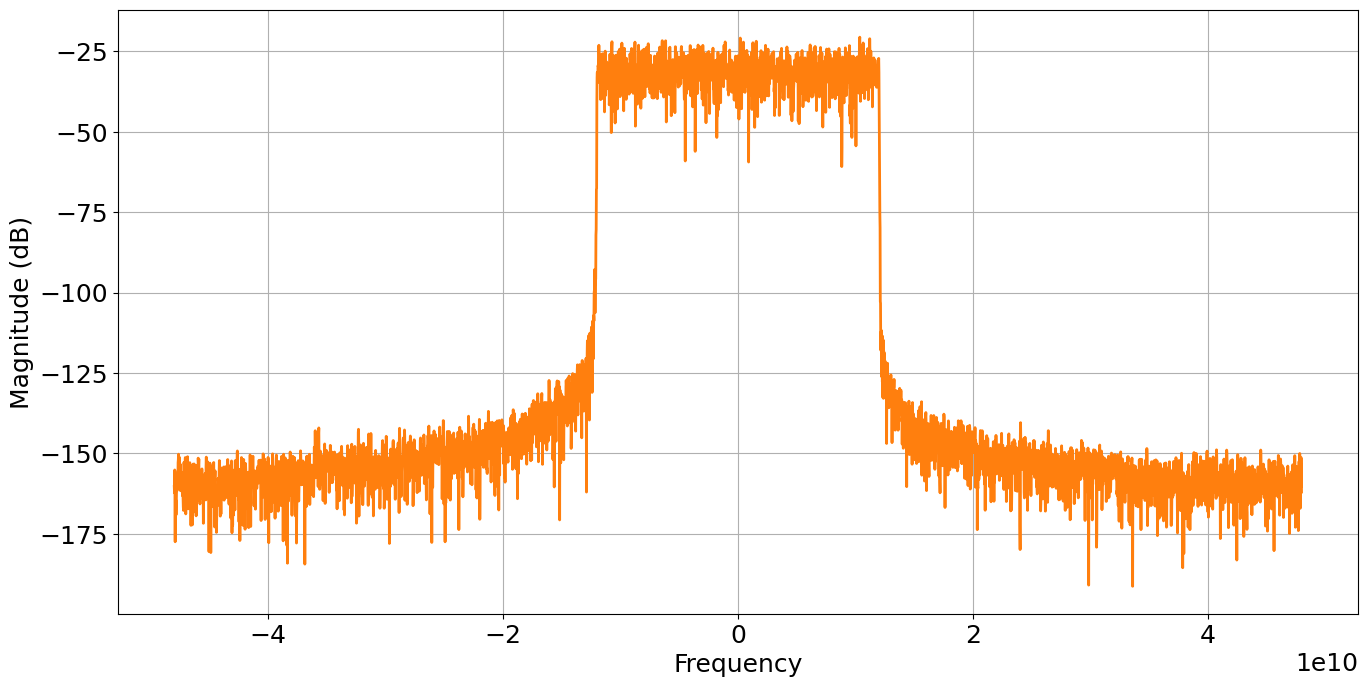

In [ ]:
plot_spectrum(reverted_signal[:,5000:size-5000])

In [ ]:
M_new = 16
A = 10
new_qam_signal = generate_signal(M_new,Fb,SpS,30,rolloff=0.05)
new_sfm,new_A = qam_signal_phase_min(new_qam_signal,A)
new_data,new_X,new_y = dataset_02(new_sfm,amostras,size)
_,_, new_X_test,_ = train_test_datasets(new_X,new_y,size)
new_predicted_signal = predict_signal(model,new_data,new_X_test,size)
new_reverted_signal = revert_sfm(new_predicted_signal,new_A)

In [ ]:
print("BER (teórica): ", np.array2string(ber_theory(helpers.dB2lin(30), 16)))

BER (teórica):  7.83182844e-46


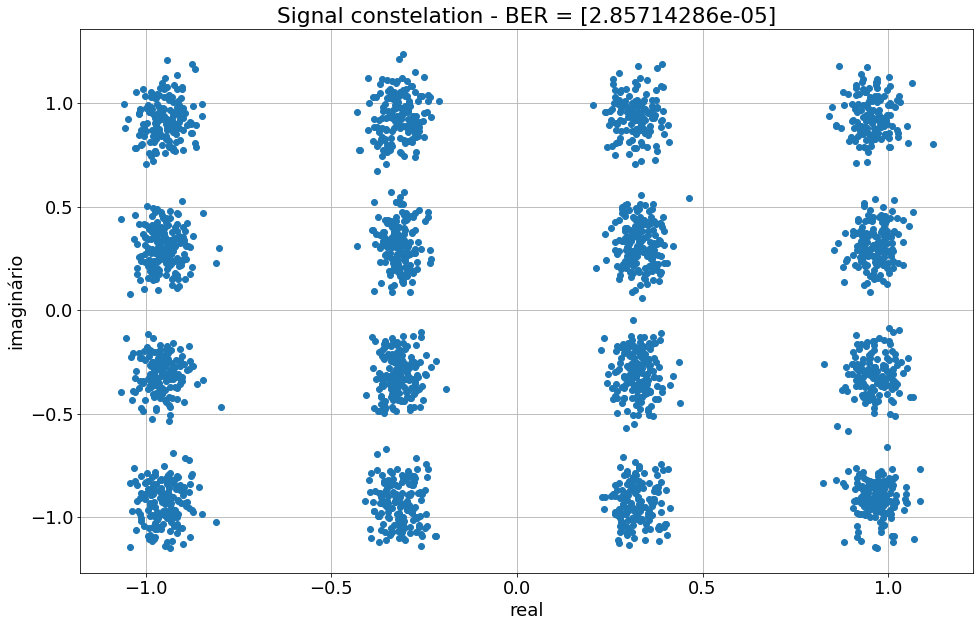

In [ ]:
plot_constelation(new_reverted_signal[:,5000:size-5000],SpS)

In [ ]:
new_reverted_signal[0,::SpS].cal_ber()

array([0.])

In [ ]:
-np.log10(new_reverted_signal[0,::SpS].cal_ber())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([inf])

In [ ]:
print("BER (teórica): ", np.array2string(ber_theory(helpers.dB2lin(20), M_new)))

BER (teórica):  2.90408116e-06


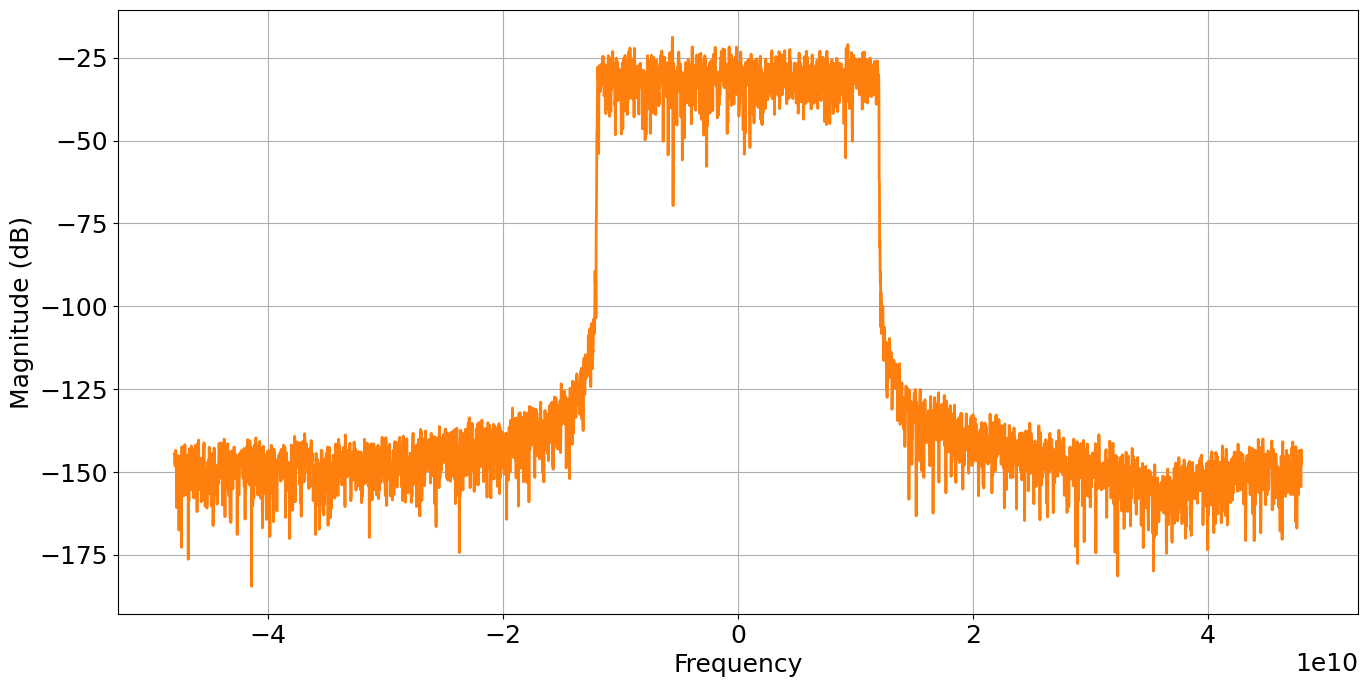

In [ ]:
plot_spectrum(new_reverted_signal)

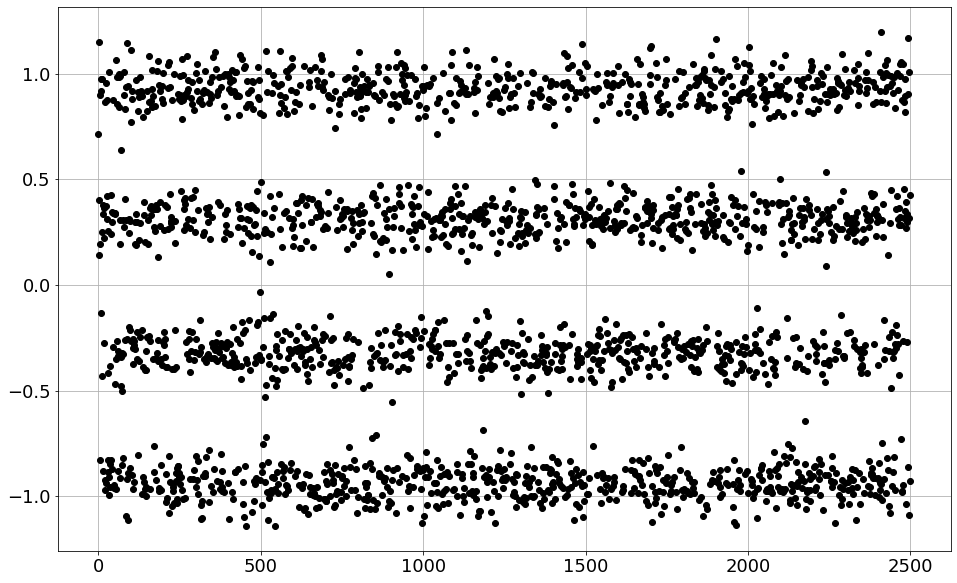

In [ ]:
plt.plot(new_reverted_signal.real[0,:10000:SpS],'ok')
plt.grid(True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                8208      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 8,281
Trainable params: 8,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('model_sps_2.h5')

In [24]:
SpS = 8
amostras = 256
for CSPR_log in [4,5]:# range(4,17):#
  CSPR = 10**(CSPR_log/10)
  print(f'>>>>>>>>>>>>>>> SPS = {SpS} e amostras = {amostras} e CSPR = {CSPR_log} <<<<<<<<<<<<<<<')
  qam_signal = generate_signal(M,Fb,SpS,SNR)
  A = np.sqrt(2*CSPR*np.mean(np.abs(qam_signal**2)))
  print(f'A = {A}')
  sfm , _ , _ = qam_signal_phase_min(qam_signal,A)
  data,X,y = dataset_02(sfm,amostras,size)
  X_train, y_train, X_test, y_test = train_test_datasets(X,y,size)
  model = ANN_model(X_train, y_train,X_test, y_test,patience=5)
  model.save(f'model_{SpS}_sps_{amostras}_amostras_{CSPR_log}_CSPR.h5')
  print()
  print('\n\n')

>>>>>>>>>>>>>>> SPS = 8 e amostras = 256 e CSPR = 4 <<<<<<<<<<<<<<<
A = 2.2417225308080546
Epoch 1/300
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1095 - val_loss: 0.1082
Epoch 2/300
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1094 - val_loss: 0.1083
Epoch 3/300
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1094 - val_loss: 0.1083
Epoch 4/300
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1094 - val_loss: 0.1082
Epoch 5/300
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1094 - val_loss: 0.1082
Epoch 6/300
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1094 - val_loss: 0.1083
Epoch 7/300
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1094 - val_loss: 0.1082
Epoch 8/300
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1094 - val_loss: 0.1082
Epoch 9/300
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1094 -

In [ ]:
10*np.log10(np.arange(2,20))

array([ 3.01029996,  4.77121255,  6.02059991,  6.98970004,  7.7815125 ,
        8.4509804 ,  9.03089987,  9.54242509, 10.        , 10.41392685,
       10.79181246, 11.13943352, 11.46128036, 11.76091259, 12.04119983,
       12.30448921, 12.55272505, 12.78753601])

In [ ]:
10**(np.arange(4,20)/10)

array([ 2.51188643,  3.16227766,  3.98107171,  5.01187234,  6.30957344,
        7.94328235, 10.        , 12.58925412, 15.84893192, 19.95262315,
       25.11886432, 31.6227766 , 39.81071706, 50.11872336, 63.09573445,
       79.43282347])